In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("Preprocessed_loanpredict.csv")

In [4]:
dataset

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [5]:
def quanqual(dataset):
    quan=[]
    qual=[]
    for columnname in dataset.columns:
        if(dataset[columnname].dtype=='O'):
            qual.append(columnname)
        else:
            quan.append(columnname)
    return quan,qual

In [6]:
quan,qual=quanqual(dataset)

In [7]:
quan

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Default']

In [8]:
qual

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [9]:
rows=['Mean','Median','Mode','Q1-25%','Q2-50%','Q3-75%','Q4-100%','IQR','Min','Max','Lesser','Greater','Kurtosis','Skew','Var','Std']
descriptive=pd.DataFrame(index=rows, columns=quan)

In [10]:
#Finding Outliers
Lesser=[]
Greater=[]
for columnname in quan:
    if(descriptive[columnname]['Min']<descriptive[columnname]['Lesser']):
        Lesser.append(columnname)
    if(descriptive[columnname]['Max']>descriptive[columnname]['Greater']):
        Greater.append(columnname)
        

In [11]:
def Univariate(dataset, quan):
    rows=['Mean','Median','Mode','Q1-25%','Q2-50%','Q3-75%','Q4-100%','IQR','Min','Max','Lesser','Greater','Kurtosis','Skew','Var','Std']
    descriptive=pd.DataFrame(index=rows, columns=quan)
    for columnname in quan:
        descriptive.loc['Mean',columnname]=dataset[columnname].mean()
        descriptive.loc['Median',columnname]=dataset[columnname].median()
        descriptive.loc['Mode',columnname]=dataset[columnname].mode()[0]

        q1=dataset[columnname].quantile(0.25)
        q2=dataset[columnname].quantile(0.50)
        q3=dataset[columnname].quantile(0.75)
        q4=dataset[columnname].quantile(1.00)

        descriptive.loc['Q1-25%',columnname]=q1
        descriptive.loc['Q2-50%',columnname]=q2
        descriptive.loc['Q3-75%',columnname]=q3
        descriptive.loc['Q4-100%',columnname]=q4

        iqr=q3-q1
        descriptive.loc['IQR',columnname]=iqr
        descriptive.loc['Min',columnname]=dataset[columnname].min()
        descriptive.loc['Max',columnname]=dataset[columnname].max()

        descriptive.loc['Lesser',columnname]=q1-1.5*iqr
        descriptive.loc['Greater',columnname]=q3+1.5*iqr

        descriptive.loc['Kurtosis',columnname]=dataset[columnname].kurtosis()
        descriptive.loc['Skew',columnname]=dataset[columnname].skew()
        descriptive.loc['Var',columnname]=dataset[columnname].var()
        descriptive.loc['Std',columnname]=dataset[columnname].std()
    return descriptive
        
        

In [12]:
descriptive=Univariate(dataset,quan)

In [13]:
descriptive

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
Median,43.0,82466.0,127556.0,574.0,60.0,2.0,13.46,36.0,0.5,0.0
Mode,55,69492,95419,630,56,2,14.92,48,0.67,0
Q1-25%,31.0,48825.5,66156.0,437.0,30.0,2.0,7.77,24.0,0.3,0.0
Q2-50%,43.0,82466.0,127556.0,574.0,60.0,2.0,13.46,36.0,0.5,0.0
Q3-75%,56.0,116219.0,188985.0,712.0,90.0,3.0,19.25,48.0,0.7,0.0
Q4-100%,69.0,149999.0,249999.0,849.0,119.0,4.0,25.0,60.0,0.9,1.0
IQR,25.0,67393.5,122829.0,275.0,60.0,1.0,11.48,24.0,0.4,0.0
Min,18,15000,5000,300,0,1,2.0,12,0.1,0
Max,69,149999,249999,849,119,4,25.0,60,0.9,1


In [14]:
descriptive.cov()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,2.990483e+03,1.782192e+10,5.891216e+10,3.000716e+05,1.497010e+04,3.314805e+01,6.876453e+02,3.719165e+03,1.043080e+01,-1.703605e+01
Income,1.782192e+10,1.440288e+17,4.761248e+17,2.350939e+12,1.087683e+11,-6.027629e+07,3.051636e+09,2.433895e+10,-2.969712e+07,-4.452260e+07
LoanAmount,5.891216e+10,4.761248e+17,1.573954e+18,7.771607e+12,3.595563e+11,-1.994066e+08,1.008681e+10,8.045612e+10,-9.822234e+07,-1.471459e+08
CreditScore,3.000716e+05,2.350939e+12,7.771607e+12,3.848222e+07,1.792622e+06,-5.000195e+02,5.336997e+04,4.054597e+05,-3.200985e+02,-8.755478e+02
MonthsEmployed,1.497010e+04,1.087683e+11,3.595563e+11,1.792622e+06,8.537382e+04,3.060405e+01,2.945854e+03,1.977624e+04,4.419863e+00,-4.759614e+01
NumCreditLines,3.314805e+01,-6.027629e+07,-1.994066e+08,-5.000195e+02,3.060405e+01,2.398900e+00,1.450205e+01,2.594244e+01,8.268473e-01,-8.206812e-01
InterestRate,6.876453e+02,3.051636e+09,1.008681e+10,5.336997e+04,2.945854e+03,1.450205e+01,1.932423e+02,7.999016e+02,4.946491e+00,-4.456630e+00
LoanTerm,3.719165e+03,2.433895e+10,8.045612e+10,4.054597e+05,1.977624e+04,2.594244e+01,7.999016e+02,4.755769e+03,7.716902e+00,-1.718117e+01
DTIRatio,1.043080e+01,-2.969712e+07,-9.822234e+07,-3.200985e+02,4.419863e+00,8.268473e-01,4.946491e+00,7.716902e+00,3.278046e-01,-3.712024e-01
Default,-1.703605e+01,-4.452260e+07,-1.471459e+08,-8.755478e+02,-4.759614e+01,-8.206812e-01,-4.456630e+00,-1.718117e+01,-3.712024e-01,1.144654e+00


In [15]:
descriptive.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,0.858735,0.858694,0.884554,0.936897,0.391364,0.904571,0.986199,0.333150,-0.291180
Income,0.858735,1.000000,1.000000,0.998589,0.980879,-0.102545,0.578438,0.929965,-0.136673,-0.109653
LoanAmount,0.858694,1.000000,1.000000,0.998584,0.980863,-0.102621,0.578371,0.929935,-0.136743,-0.109626
CreditScore,0.884554,0.998589,0.998584,1.000000,0.989000,-0.052042,0.618893,0.947779,-0.090125,-0.131921
MonthsEmployed,0.936897,0.980879,0.980863,0.989000,1.000000,0.067626,0.725267,0.981456,0.026420,-0.152255
NumCreditLines,0.391364,-0.102545,-0.102621,-0.052042,0.067626,1.000000,0.673554,0.242881,0.932420,-0.495258
InterestRate,0.904571,0.578438,0.578371,0.618893,0.725267,0.673554,1.000000,0.834402,0.621496,-0.299653
LoanTerm,0.986199,0.929965,0.929935,0.947779,0.981456,0.242881,0.834402,1.000000,0.195445,-0.232866
DTIRatio,0.333150,-0.136673,-0.136743,-0.090125,0.026420,0.932420,0.621496,0.195445,1.000000,-0.605991
Default,-0.291180,-0.109653,-0.109626,-0.131921,-0.152255,-0.495258,-0.299653,-0.232866,-0.605991,1.000000


In [16]:
import pandas as pd

# Load dataset
dataset = pd.read_csv("Preprocessed_loanpredict.csv")

# Randomly sample 10,000 rows
dataset = dataset.sample(n=1000, random_state=42)

# Save reduced dataset
dataset.to_csv("reduced_dataset.csv", index=False)

In [17]:
dataset.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

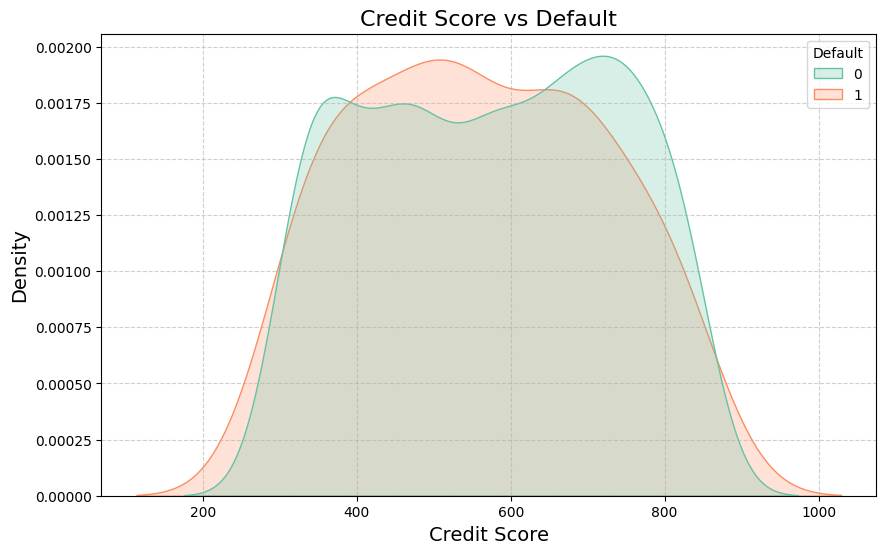

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=dataset, x="CreditScore", hue="Default", common_norm=False, fill=True, palette="Set2")
plt.title("Credit Score vs Default", fontsize=16)
plt.xlabel("Credit Score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [23]:
features = {
    "Income":"Income vs Default",
    "LoanAmount":"LoanAmount vs Default:",
    }
# Pick a palette with enough unique colors
palette_list = sns.color_palette(palette="pastel", n_colors=len(features))

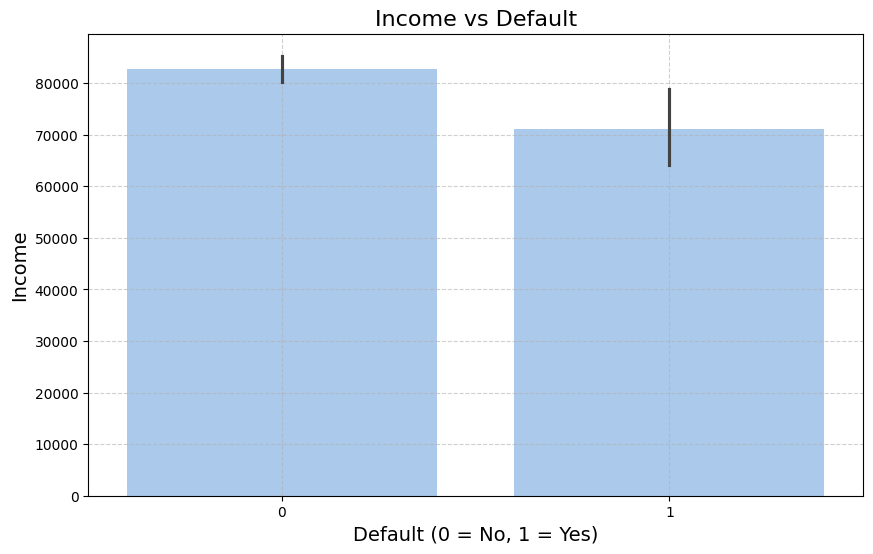

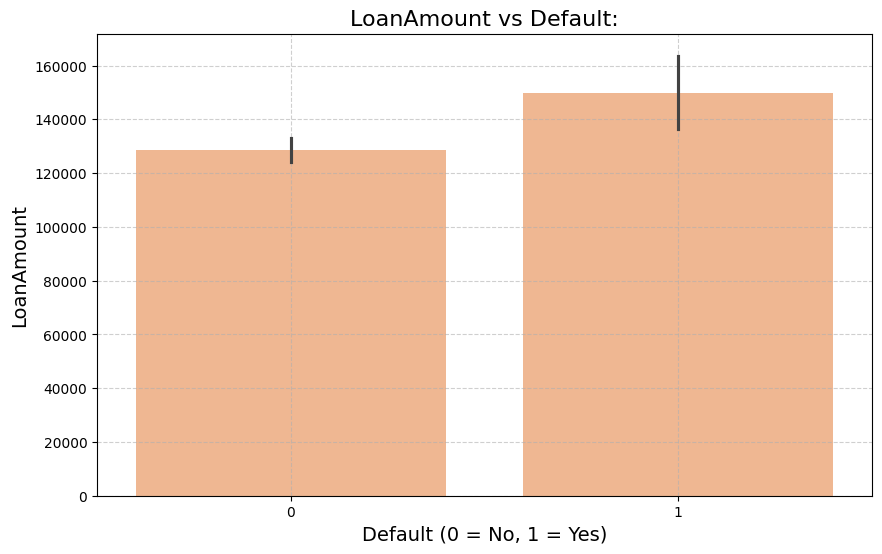

In [24]:
for i, (col, title) in enumerate(features.items()):
    plt.figure(figsize = (10,6))

    if col in ["Income", "LoanAmount"]:
        #Box Plt
        sns.barplot(data=dataset, x="Default", y=col, palette=[palette_list[i]])
        plt.ylabel(col, fontsize=14)

        plt.title(title, fontsize=16)
        plt.xlabel("Default (0 = No, 1 = Yes)", fontsize=14)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()